In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [3]:
import glob
import os

In [4]:
size=224

train_images=[]
train_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/augmented_main_images_wavelet_binary/train/*"):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [5]:
test_images=[]
test_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/val/*"):
    fruit_label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)


x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

x_train,x_test=x_train/255.0,x_test/255.0


import seaborn as sns
from tensorflow.keras.applications.vgg19 import VGG19

VGG19_model=VGG19(weights='imagenet',include_top=False,input_shape=(size,size,3))

for layer in VGG19_model.layers:
    layer.trainable=False

VGG19_feature_extractor=VGG19_model.predict(x_train)
VGG19_features=VGG19_feature_extractor.reshape(VGG19_feature_extractor.shape[0],-1)


VGG19_X=VGG19_features

61/61 [==============================] - 1292s 21s/step


In [7]:
VGG19_X.shape

(1952, 25088)

In [8]:
VGG19_X_test_feature=VGG19_model.predict(x_test)
VGG19_X_test_features=VGG19_X_test_feature.reshape(VGG19_X_test_feature.shape[0],-1)


2/2 [==============================] - 30s 9s/step


In [9]:
from sklearn.manifold import TSNE
model=TSNE(n_components=16,random_state=0,n_iter=5000,method='exact')
tsne_data=model.fit_transform(VGG19_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((0,1))
x_scaled=scaler.fit_transform(tsne_data)

In [11]:
train_data_0=x_scaled[0:500]
train_data_1=x_scaled[1400:1900]
test_data_0=x_scaled[500:550]
test_data_1=x_scaled[1900:1950]

train_label_0=y_train[0:500]
train_label_1=y_train[1400:1900]
test_label_0=y_train[500:550]
test_label_1=y_train[1900:1950]

In [15]:
test_label_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
train=np.vstack((train_data_0,train_data_1))
test=np.vstack((test_data_0,test_data_1))

train_label=np.vstack((train_label_0,train_label_1))
test_label=np.vstack((test_label_0,test_label_1))

In [23]:
train_label=np.reshape(train_label,(1000,))

In [26]:
test_label=np.reshape(test_label,(100,))

In [27]:
pd.DataFrame(train).to_excel('parkinson_training_data.xlsx',header=None)
pd.DataFrame(test).to_excel('parkinson_testing_data.xlsx',header=None)
pd.DataFrame(train_label).to_excel('parkinson_training_label.xlsx',header=None)
pd.DataFrame(test_label).to_excel('parkinson_testing_label.xlsx',header=None)

In [18]:
x_train=x_scaled[0:1000]
x_test=x_scaled[1000:1100]

In [23]:
import pandas as pd
train_data=y_train[0:1000]
y_test=y_train[1000:1100]

In [26]:
x_test

array([[0.5271595 , 0.40285766, 0.36372042, ..., 0.5200703 , 0.43789   ,
        0.6076264 ],
       [0.49425584, 0.20745057, 0.3964308 , ..., 0.56392354, 0.5027691 ,
        0.35102028],
       [0.44192904, 0.53000206, 0.6910786 , ..., 0.5553748 , 0.4985211 ,
        0.31774965],
       ...,
       [0.38648486, 0.7149544 , 0.20366105, ..., 0.5685741 , 0.7276375 ,
        0.53145117],
       [0.58700526, 0.32213056, 0.46364757, ..., 0.7057158 , 0.3220626 ,
        0.7027713 ],
       [0.31982085, 0.53419024, 0.41270816, ..., 0.48461825, 0.47267786,
        0.4963364 ]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
VGG19_RF=RandomForestClassifier(n_estimators=200,random_state=42)

VGG19_RF.fit(VGG19_X,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
VGG19_prediction_RF=VGG19_RF.predict(VGG19_X_test_features)
VGG19_prediction_RF1=le.inverse_transform(VGG19_prediction_RF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_RF))

Accuracy=  0.8913043478260869


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_RF))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.92      0.88      0.90        26

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



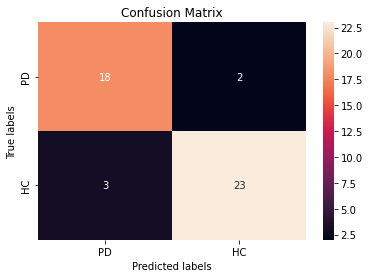

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels_encoded,VGG19_prediction_RF)
ax= plt.subplot()
sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

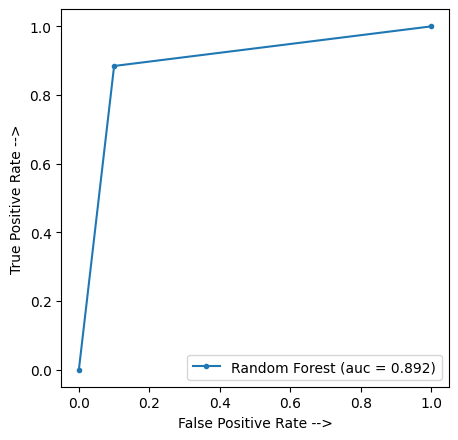

In [ ]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_RF)
auc_RF = auc(RF_fpr, RF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from sklearn.svm import SVC
VGG19_SF=SVC(kernel='rbf',C=13,probability=True)
VGG19_SF.fit(VGG19_X,y_train)

VGG19_prediction_SF=VGG19_SF.predict(VGG19_X_test_features)
VGG19_prediction_SF1=le.inverse_transform(VGG19_prediction_SF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_SF))

Accuracy=  0.8913043478260869


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_SF))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.96      0.85      0.90        26

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



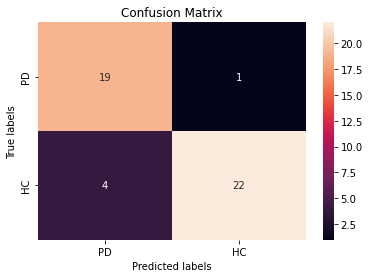

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels_encoded,VGG19_prediction_SF)
ax=plt.subplot()
sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

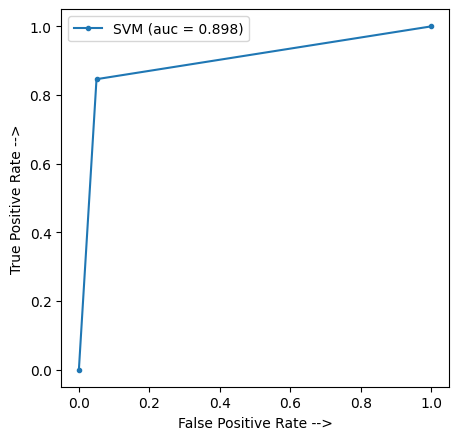

In [ ]:
from sklearn.metrics import roc_curve, auc

SF_fpr, SF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_SF)
auc_SF = auc(SF_fpr, SF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(SF_fpr, SF_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_SF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
VGG19_LF=LogisticRegression()
VGG19_LF.fit(VGG19_X,y_train)

VGG19_prediction_LF=VGG19_LF.predict(VGG19_X_test_features)
VGG19_prediction_LF1=le.inverse_transform(VGG19_prediction_LF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_LF))

Accuracy=  0.8478260869565217


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_LF))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.91      0.81      0.86        26

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



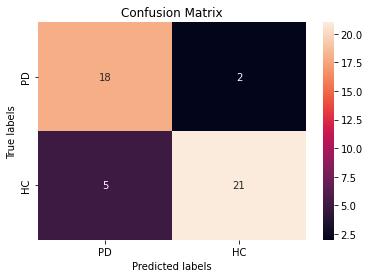

In [ ]:
cm2=confusion_matrix(test_labels_encoded,VGG19_prediction_LF)
ax=plt.subplot()
sns.heatmap(cm2,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

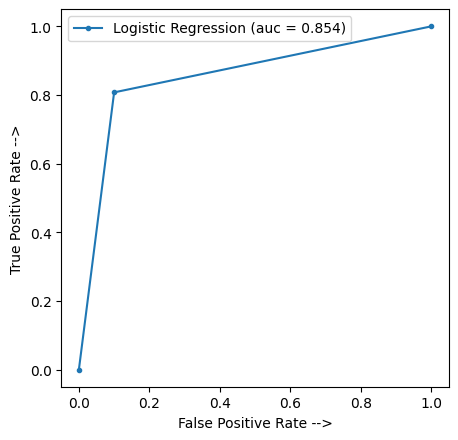

In [ ]:
from sklearn.metrics import roc_curve, auc

LF_fpr, LF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_LF)
auc_LF = auc(LF_fpr, LF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(LF_fpr, LF_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % auc_LF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
VGG19_knn=KNeighborsClassifier(n_neighbors=8,weights='uniform',algorithm='brute',metric='minkowski')
VGG19_knn.fit(VGG19_X,y_train)
VGG19_prediction_knn=VGG19_knn.predict(VGG19_X_test_features)
VGG19_prediction_knn1=le.inverse_transform(VGG19_prediction_knn)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_knn))

Accuracy=  0.8695652173913043


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_knn))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.86      0.92      0.89        26

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.87        46
weighted avg       0.87      0.87      0.87        46



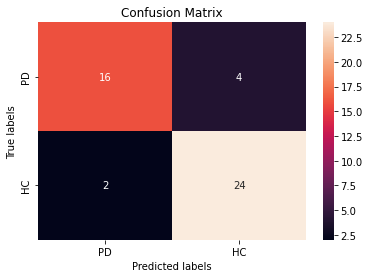

In [ ]:
cm4=confusion_matrix(test_labels_encoded,VGG19_prediction_knn)
ax=plt.subplot()
sns.heatmap(cm4,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);


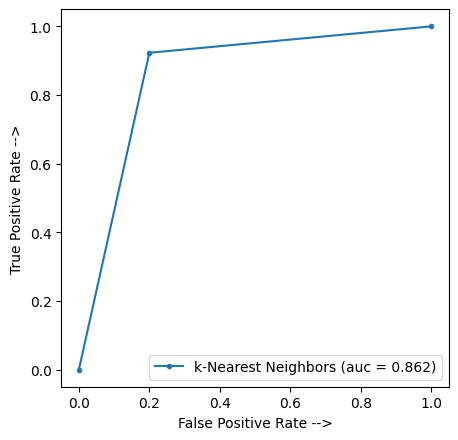

In [ ]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_knn)
auc_knn = auc(knn_fpr, knn_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(knn_fpr, knn_tpr, marker='.', label='k-Nearest Neighbors (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf1=VotingClassifier(
                            estimators=[('svc',VGG19_SF),('lr',VGG19_LF),('knn',VGG19_knn),('rf',VGG19_RF)],
                            voting='soft'
)

voting_clf2=VotingClassifier(
                            estimators=[('svc',VGG19_SF),('lr',VGG19_LF),('knn',VGG19_knn),('rf',VGG19_RF)],
                            voting='hard'
)

In [ ]:
voting_clf1.fit(VGG19_X,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('svc', SVC(C=13, probability=True)),
                             ('lr', LogisticRegression()),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=8)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
VGG19_prediction_softVoting=voting_clf1.predict(VGG19_X_test_features)
VGG19_prediction_softVoting1=le.inverse_transform(VGG19_prediction_softVoting)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_softVoting))

Accuracy=  0.9130434782608695


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_softVoting))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.96      0.88      0.92        26

    accuracy                           0.91        46
   macro avg       0.91      0.92      0.91        46
weighted avg       0.92      0.91      0.91        46



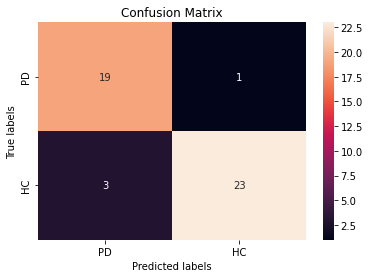

In [ ]:
cm6=confusion_matrix(test_labels_encoded,VGG19_prediction_softVoting)
ax=plt.subplot()
sns.heatmap(cm6,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

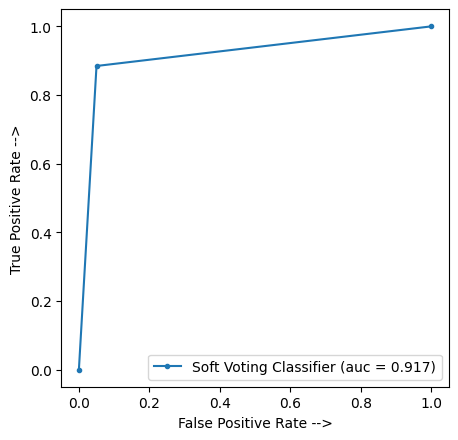

In [ ]:
from sklearn.metrics import roc_curve, auc

SoftVoting_fpr, SoftVoting_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_softVoting)
auc_SoftVoting = auc(SoftVoting_fpr, SoftVoting_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(SoftVoting_fpr, SoftVoting_tpr, marker='.', label='Soft Voting Classifier (auc = %0.3f)' % auc_SoftVoting)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()